In [12]:
import glob
import datetime
import pandas as pd

In [13]:
def get_files_sorted_by_date_after_a_date(look_for_this_pattern,cutoffdate):
    
    csvs = glob.glob(look_for_this_pattern)
    datetimes=[datetime.datetime(int(each.split('/')[-1][5:9]),
                             int(each.split('/')[-1][10:12]),
                             int(each.split('/')[-1][13:15]),
                             int(each.split('/')[-1][16:18]),
                             int(each.split('/')[-1][19:21]),
                             int(each.split('/')[-1][22:24])) for each in csvs]

    dt_csvs_filtered=[[dt, csv] for dt, csv in zip(datetimes,csvs) if dt > datetime.datetime(*cutoffdate)]
    
    sorted_filtered_csvs = [csv
                        for _, csv in sorted(
                                         zip([eachpair[0] for eachpair in dt_csvs_filtered],
                                             [eachpair[1] for eachpair in dt_csvs_filtered]))]
    
    return sorted_filtered_csvs

In [20]:
def searchlist_maker(csv,excelfile=False,multisheet=False,columnsfiltered=False, headerwechoose='name_list',**kwargs):
    
    if not multisheet:
        if excelfile: persondatadict = pd.read_excel(csv)

        else:
            persondatadict = pd.read_csv(csv)

        if 'alias_separator' in kwargs:
            persondata_searchlist = [[eachalias.strip()
                                    for eachalias in eachperson.split(kwargs['alias_separator'])]
                                    for eachperson in persondatadict[headerwechoose]
                                    if type(eachperson) != float]
        else:
            persondata_searchlist = [[each]
                                    for each in persondatadict[headerwechoose]]

    if multisheet:
        
        if not columnsfiltered:

            xls=pd.ExcelFile(csv)
            dfs=[pd.read_excel(xls,sheet) for i, sheet in enumerate(xls.sheet_names)]
            persondata_searchlist=[[name] for df in dfs for name in df['name_list'] if type(name) is not float]

        if columnsfiltered:
            
            unifieddf=pd.concat([pd.read_excel(csv, sheetname)[column]
                        for sheetname in pd.ExcelFile(csv).sheet_names
                        for column in pd.read_excel(csv, sheetname)
                        if 'LOOKFOR' in column]).dropna().drop_duplicates()
            
            persondata_searchlist = [[each] for each in unifieddf]
            
    return persondata_searchlist

In [18]:
class dictionary_class:
    def __init__(self, name, maxcolnum, searchlist=None, geo=False):
        self.name = name
        self.maxcolnum = maxcolnum
        self.searchlist = searchlist
        self.geo = geo

In [14]:
todofiles=get_files_sorted_by_date_after_a_date('/mnt/volume/anagy/mediascraper/mediaScraper/output/data*csv',
                                               [2020,7,1,0])

In [22]:
dictionaries=[
dictionary_class('szotar_2.1',
           10,
           searchlist_maker('/mnt/volume/jupyter/szokereso/szotar_2.1.xlsx',multisheet=True))]

In [15]:
targetdf = pd.read_csv(todofiles[0])

In [28]:
texts = targetdf['TEXT'].tolist()[:100]

In [54]:
dictionaries[0].searchlist

[['Fónagy János'],
 ['Biró Marcell'],
 ['Juhász Edit'],
 ['Kovács József'],
 ['Orbán Balázs'],
 ['Janó Márk'],
 ['Azbej Tristan'],
 ['Aszódi Attila'],
 ['Kovács Pál'],
 ['Becskeházi Attila'],
 ['Fürjes Balázs'],
 ['Potápi Árpád János'],
 ['Soltész Miklós'],
 ['Takács Szabolcs Ferenc'],
 ['Tuzson Bence'],
 ['György István'],
 ['Varga Judit'],
 ['Dömötör Csaba'],
 ['Vidoven Árpád'],
 ['Rédey Krisztina'],
 ['Nagy János'],
 ['Kovács Zoltán'],
 ['Tuzson Bence'],
 ['Farkas Sándor'],
 ['Tomasitz István'],
 ['Szinay Attila'],
 ['Bitay Márton Örs'],
 ['Zambó Péter'],
 ['Feldman Zsolt'],
 ['Kis Miklós Zsolt'],
 ['Rácz András'],
 ['Zsigó Róbert'],
 ['Kontrát Károly'],
 ['Felkai László'],
 ['Pogácsás Tibor'],
 ['Rétvári Bence'],
 ['Latorcai Csaba'],
 ['Bódis József'],
 ['Maruzsa Zoltán'],
 ['Fekete Péter'],
 ['Fülöp Attila'],
 ['Nagy Anikó'],
 ['Horváth Ildikó'],
 ['Pacsay-Tomassich Orsolya'],
 ['Lőrinczi Zoltán'],
 ['Szabó Tünde'],
 ['Novák Katalin'],
 ['Vitályos Eszter'],
 ['Németh Szilárd'],
 [

In [31]:
import string

In [42]:
textsCleaned = \
[' '.join(text.translate(str.maketrans('', '', string.punctuation)).splitlines()) for text in texts]
# https://stackoverflow.com/a/275659/8565438

In [46]:
worddict={word:set() for text in textsCleaned for word in text.split(' ')}

In [51]:
for texti, text in enumerate(textsCleaned):
    for wordi, word in enumerate(text.split(' ')):
        worddict[word].add(texti)

In [52]:
names = [eachalias for eachname in dictionaries[0].searchlist for eachalias in eachname]

In [53]:
names

['Fónagy János',
 'Biró Marcell',
 'Juhász Edit',
 'Kovács József',
 'Orbán Balázs',
 'Janó Márk',
 'Azbej Tristan',
 'Aszódi Attila',
 'Kovács Pál',
 'Becskeházi Attila',
 'Fürjes Balázs',
 'Potápi Árpád János',
 'Soltész Miklós',
 'Takács Szabolcs Ferenc',
 'Tuzson Bence',
 'György István',
 'Varga Judit',
 'Dömötör Csaba',
 'Vidoven Árpád',
 'Rédey Krisztina',
 'Nagy János',
 'Kovács Zoltán',
 'Tuzson Bence',
 'Farkas Sándor',
 'Tomasitz István',
 'Szinay Attila',
 'Bitay Márton Örs',
 'Zambó Péter',
 'Feldman Zsolt',
 'Kis Miklós Zsolt',
 'Rácz András',
 'Zsigó Róbert',
 'Kontrát Károly',
 'Felkai László',
 'Pogácsás Tibor',
 'Rétvári Bence',
 'Latorcai Csaba',
 'Bódis József',
 'Maruzsa Zoltán',
 'Fekete Péter',
 'Fülöp Attila',
 'Nagy Anikó',
 'Horváth Ildikó',
 'Pacsay-Tomassich Orsolya',
 'Lőrinczi Zoltán',
 'Szabó Tünde',
 'Novák Katalin',
 'Vitályos Eszter',
 'Németh Szilárd',
 'Kádár Pál',
 'Vidoven Árpád',
 'Szabó István',
 'Völner Pál',
 'Raisz Anikó',
 'Kecsmár Krisztián'

In [79]:
import time
import numpy as np
np.random.seed(42)

In [74]:
letters=[np.random.choice([letter for letter in string.ascii_lowercase]) for _ in range(1000)]

In [86]:
print(letters)

['w', 'n', 'k', 'o', 'm', 'r', 'z', 'f', 'c', 's', 'o', 'y', 'w', 'e', 'j', 'g', 'y', 'q', 'g', 'v', 'z', 'l', 'y', 'q', 'm', 't', 'y', 'd', 'j', 'c', 'i', 'm', 'r', 'o', 'd', 'o', 'v', 'b', 'o', 'h', 'h', 'q', 'l', 's', 'j', 'i', 'e', 'f', 't', 'z', 'b', 'x', 'm', 'f', 'e', 'y', 'a', 'u', 'v', 'u', 'f', 'f', 'w', 'p', 'd', 'k', 'x', 'w', 'i', 'w', 'c', 's', 'h', 'e', 'd', 'x', 'f', 'b', 't', 'k', 'd', 'o', 'f', 'v', 'q', 'x', 'f', 's', 'y', 'b', 'o', 'k', 'h', 'z', 's', 'm', 'l', 'e', 'f', 'z', 'v', 'd', 's', 't', 'a', 't', 'q', 'l', 'o', 'a', 'z', 'n', 'f', 'e', 'k', 'd', 'm', 'k', 'c', 'a', 'f', 'r', 'x', 'j', 'e', 'w', 'j', 'l', 'b', 'm', 'h', 'b', 't', 'a', 'e', 'i', 'q', 'i', 'k', 'o', 'x', 'f', 'w', 'c', 'q', 'e', 'l', 'r', 'n', 'u', 'x', 'k', 'i', 'b', 'l', 'c', 'c', 'a', 'h', 'v', 'h', 'k', 'i', 'e', 'n', 'c', 'u', 'e', 'e', 's', 'n', 'z', 'd', 'y', 'm', 'j', 'y', 'r', 'h', 'h', 'g', 'h', 'n', 's', 'f', 'a', 'w', 'o', 'a', 'y', 'q', 'a', 'o', 'w', 'b', 'n', 'u', 'h', 'h', 's',

In [97]:
original_sol=[]
for _ in range(100):
    start = time.time()
    letterdict={letter:set() for letter in letters}
    for index, letter in enumerate(letters):
        letterdict[letter].add(index)
    end = time.time()
    original_sol.append(end-start)

In [104]:
from collections import defaultdict
defaultdict_sol=[]
for _ in range(100):
    start = time.time()
    letterdict = defaultdict(set)
    for index, letter in enumerate(set(letters)):
         letterdict[letter].add(index)
    end = time.time()
    defaultdict_sol.append(end-start)

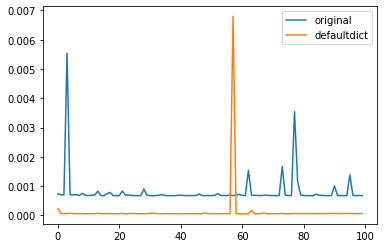

In [105]:
import matplotlib.pyplot as plt
plt.plot(original_sol, label='original')
plt.plot(defaultdict_sol, label='defaultdict')
plt.legend()

In [83]:
print(end-start)

0.0005383491516113281


In [87]:
letterdict

{'w': {0,
  12,
  62,
  67,
  69,
  125,
  142,
  186,
  193,
  220,
  260,
  295,
  304,
  308,
  366,
  390,
  399,
  400,
  406,
  409,
  434,
  441,
  457,
  458,
  478,
  500,
  517,
  558,
  610,
  620,
  640,
  655,
  675,
  676,
  693,
  697,
  780,
  873,
  940,
  952},
 'n': {1,
  111,
  148,
  164,
  170,
  182,
  195,
  263,
  290,
  297,
  301,
  377,
  396,
  423,
  425,
  433,
  477,
  483,
  494,
  537,
  646,
  664,
  703,
  723,
  733,
  749,
  764,
  802,
  882,
  888,
  924,
  943,
  957,
  990,
  996},
 'k': {2,
  65,
  79,
  91,
  114,
  117,
  138,
  151,
  161,
  251,
  254,
  264,
  274,
  294,
  327,
  334,
  347,
  426,
  453,
  493,
  502,
  540,
  548,
  550,
  573,
  576,
  588,
  672,
  745,
  751,
  766,
  805,
  820,
  859,
  868,
  876,
  932,
  938,
  953,
  960},
 'o': {3,
  10,
  33,
  35,
  38,
  81,
  90,
  108,
  139,
  187,
  192,
  210,
  211,
  232,
  238,
  241,
  261,
  272,
  311,
  313,
  379,
  413,
  418,
  450,
  559,
  568,
  612,
  63

In [89]:
{letter:set() for letter in string.ascii_lowercase}

{'a': set(),
 'b': set(),
 'c': set(),
 'd': set(),
 'e': set(),
 'f': set(),
 'g': set(),
 'h': set(),
 'i': set(),
 'j': set(),
 'k': set(),
 'l': set(),
 'm': set(),
 'n': set(),
 'o': set(),
 'p': set(),
 'q': set(),
 'r': set(),
 's': set(),
 't': set(),
 'u': set(),
 'v': set(),
 'w': set(),
 'x': set(),
 'y': set(),
 'z': set()}